# Long short term memories

## O que são?

LSTM é um modelo baseado em RNN's (Redes neurais recorrentes), que utilizam dados sequenciais para processamento. Contudo RNN's comuns são capazaes de processar sequências curtas de dados, já os modelos LSTM são capazes de armazenar sequências maiores e processá-las.

### Exemplo

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Flatten, Dense, Dropout
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

### Regressão

In [60]:
X, y = make_regression(n_samples = 500, n_features = 1, shuffle = False, random_state = 50)

#Alterando y para valor seguinte de X
y = np.roll(X,-1)

#excluindo os últimos registros, pois na rolagem receberam os valores dos primeiros
X = X[:-1]
y = y[:-1]

#Escalonando dados
X_scaler = MinMaxScaler()
X_scaler.fit(X)
X = X_scaler.transform(X)

y_scaler = MinMaxScaler()
y_scaler.fit(y)
y = y_scaler.transform(y)

#Redimensionando X e y
X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(X.shape[0])

#Separando treino e teste
limit = int(len(X)*0.80)

X_train, X_test, y_train, y_test = X[:limit], X[limit:], y[:limit], y[limit:]

In [61]:
#Criando modelo

model = Sequential()

model.add(LSTM(64, return_sequences=True,input_shape=(X.shape[1],1)))
model.add(LSTM(32))

model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer="adam", loss='mse')

model.fit(X_train, y_train, epochs=15)


Epoch 1/15
13/13 [==============================] - 0s 7ms/step - loss: 0.2207
Epoch 2/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0742
Epoch 3/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 5/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 6/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 8/15
13/13 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 9/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 10/15
13/13 [==============================] - 0s 5ms/step - loss: 0.0191
Epoch 11/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 12/15
13/13 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 13/15
13/13 [=============================

In [62]:
yhat = model.predict(X_test)

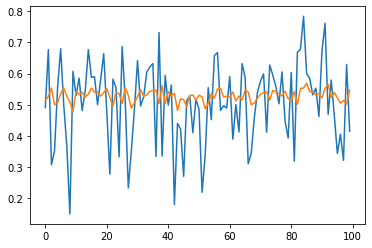

In [63]:
plt.plot(y_test)
plt.plot(yhat)

### Facebook

In [138]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 11, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})
df.head()

,Close 0
0,78.449997
1,77.190002
2,76.150002
3,76.150002
4,78.180000


In [139]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,5)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)

#Guardando primeiro valor do df atual para reescalonar depois
#first = new_df.head(1)
#new_df = new_df.diff(1)
new_df.dropna(inplace=True)

new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4
4,78.180000,76.150002,76.150002,77.190002,78.449997
5,77.739998,78.180000,76.150002,76.150002,77.190002
6,76.720001,77.739998,78.180000,76.150002,76.150002
7,76.449997,76.720001,77.739998,78.180000,76.150002
8,76.279999,76.449997,76.720001,77.739998,78.180000


In [170]:
limit = int(len(new_df)*0.75)

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4']]
y = new_df.loc[:,'Target']

#Escalonando dados
X_scaler = MinMaxScaler()
X_scaler.fit(X)
X = X_scaler.transform(X)

y_scaler = MinMaxScaler()
y = np.array(y)
y = y.reshape(-1, 1)
y_scaler.fit(y)
y = y_scaler.transform(y)

X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)

y = y.reshape(y.shape[0])

X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [171]:
#Criando modelo

model = Sequential()

model.add(LSTM(128, return_sequences=True,input_shape=(X.shape[1],1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))

model.add(Dense(50))
model.add(Dense(30))
model.add(Dense(15))
model.add(Dense(5))
model.add(Dense(1))

model.compile(optimizer="adam", loss='mse')

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0232
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 7.5736e-04
Epoch 3/100
35/35 [==============================] - 0s 14ms/step - loss: 2.3092e-04
Epoch 4/100
35/35 [==============================] - 1s 21ms/step - loss: 2.1208e-04
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 2.1444e-04: 0s - loss: 2.2055e-
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 2.0602e-04
Epoch 7/100
35/35 [==============================] - 1s 19ms/step - loss: 1.8700e-04
Epoch 8/100
35/35 [==============================] - 1s 14ms/step - loss: 1.8282e-04
Epoch 9/100
35/35 [==============================] - 1s 15ms/step - loss: 1.9275e-04
Epoch 10/100
35/35 [==============================] - 1s 15ms/step - loss: 2.3026e-04
Epoch 11/100
35/35 [==============================] - 1s 24ms/step - loss: 2.1633e-04
Epoch 12/100
35/35 [==========================

35/35 [==============================] - 1s 15ms/step - loss: 1.9290e-04
Epoch 95/100
35/35 [==============================] - 1s 17ms/step - loss: 2.0447e-04
Epoch 96/100
35/35 [==============================] - ETA: 0s - loss: 1.7175e-0 - 1s 16ms/step - loss: 1.7175e-04
Epoch 97/100
35/35 [==============================] - 1s 16ms/step - loss: 2.1052e-04: 0s - loss: 2.1441e-
Epoch 98/100
35/35 [==============================] - 1s 17ms/step - loss: 1.7392e-04
Epoch 99/100
35/35 [==============================] - 1s 16ms/step - loss: 1.7957e-04
Epoch 100/100
35/35 [==============================] - 1s 16ms/step - loss: 2.2043e-04


In [172]:
yhat = model.predict(X_test)

yhat = y_scaler.inverse_transform(yhat)

y_test = y_test.reshape(y_test.shape[0],1)
y_test = y_scaler.inverse_transform(y_test)

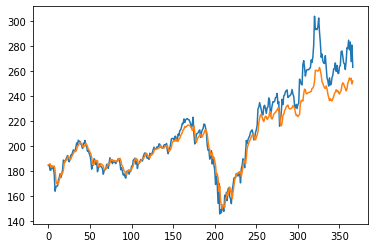

In [173]:
plt.plot(y_test)
plt.plot(yhat)

In [169]:
yhat

array([[0.49584097],
       [0.4972953 ],
       [0.4996193 ],
       [0.48987672],
       [0.4855508 ],
       [0.49184018],
       [0.49000075],
       [0.49105635],
       [0.4776222 ],
       [0.43740046],
       [0.42703333],
       [0.42567348],
       [0.42688534],
       [0.44071466],
       [0.4507622 ],
       [0.4632948 ],
       [0.46082538],
       [0.46500692],
       [0.47657722],
       [0.5010477 ],
       [0.51074696],
       [0.5116122 ],
       [0.5160697 ],
       [0.5218449 ],
       [0.52803326],
       [0.5215596 ],
       [0.515187  ],
       [0.5167662 ],
       [0.5264337 ],
       [0.53113025],
       [0.53766936],
       [0.54554206],
       [0.54698455],
       [0.5457297 ],
       [0.55305666],
       [0.56478894],
       [0.56656194],
       [0.5751751 ],
       [0.5766379 ],
       [0.5768003 ],
       [0.5719732 ],
       [0.5672545 ],
       [0.5596199 ],
       [0.56555945],
       [0.56887984],
       [0.57566625],
       [0.5694463 ],
       [0.563

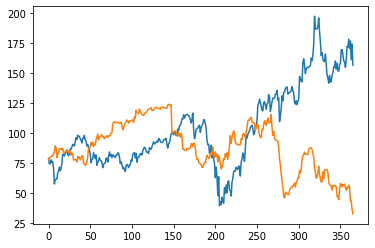

In [137]:
plt.plot(original_target)
plt.plot(normal_prediction)

In [127]:
yhat

array([[-0.27834836],
       [-0.3121983 ],
       [-0.4757376 ],
       ...,
       [ 5.6092014 ],
       [ 0.7457294 ],
       [-6.0490284 ]], dtype=float32)